In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum() 
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [4]:
# Ensure necessary columns: 'Category', 'ship-city', 'ship-state', 'Status'
relevant_columns = ['Category', 'ship-city', 'ship-state', 'Status', 'Amount']
df = df.dropna(subset=relevant_columns)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

print(f"Dataset after cleaning: {df.shape[0]} rows")


Dataset after cleaning: 121143 rows


In [ ]:
# Identify Cancellations and Returns
cancellation_keywords = ['Cancelled', 'Returned']
df['Is_Cancelled_or_Returned'] = df['Status'].apply(
    lambda x: any(keyword in str(x) for keyword in cancellation_keywords)
)
# Cancellations and Returns by Product Category
category_cancellations = df[df['Is_Cancelled_or_Returned']].groupby('Category')['Is_Cancelled_or_Returned'].count().sort_values(ascending=False)

# Cancellations and Returns by City
city_cancellations = df[df['Is_Cancelled_or_Returned']].groupby('ship-city')['Is_Cancelled_or_Returned'].count().sort_values(ascending=False)

# Cancellations and Returns by State
state_cancellations = df[df['Is_Cancelled_or_Returned']].groupby('ship-state')['Is_Cancelled_or_Returned'].count().sort_values(ascending=False) 
# Analyze rate of returns
df['Total_Orders'] = df.groupby('Category')['Status'].transform('count')
df['Cancellation_Return_Rate'] = df.groupby('Category')['Is_Cancelled_or_Returned'].transform('sum') / df['Total_Orders']

print("\nTop Categories by Cancellations and Returns:")
print(category_cancellations.head(10))

print("\nTop Cities by Cancellations and Returns:")
print(city_cancellations.head(10))

print("\nTop States by Cancellations and Returns:")
print(state_cancellations.head(10))

print("\nCategories with Highest Cancellation/Return Rates:")
print(df[['Category', 'Cancellation_Return_Rate']].drop_duplicates().sort_values(by='Cancellation_Return_Rate', ascending=False).head(10))


Top Categories by Cancellations and Returns:
Category
T-shirt     4966
Shirt       4898
Blazzer     1649
Trousers     952
Perfume       96
Wallet        87
Socks         45
Shoes         13
Name: Is_Cancelled_or_Returned, dtype: int64

Top Cities by Cancellations and Returns:
ship-city
BENGALURU    889
HYDERABAD    784
MUMBAI       537
NEW DELHI    518
CHENNAI      513
PUNE         353
KOLKATA      218
THANE        167
LUCKNOW      155
GURUGRAM     149
Name: Is_Cancelled_or_Returned, dtype: int64

Top States by Cancellations and Returns:
ship-state
MAHARASHTRA       2051
KARNATAKA         1506
UTTAR PRADESH     1142
TELANGANA         1106
TAMIL NADU        1075
KERALA             821
ANDHRA PRADESH     613
DELHI              604
WEST BENGAL        589
Gujarat            430
Name: Is_Cancelled_or_Returned, dtype: int64

Categories with Highest Cancellation/Return Rates:
       Category  Cancellation_Return_Rate
3       Blazzer                  0.112162
85        Socks                  

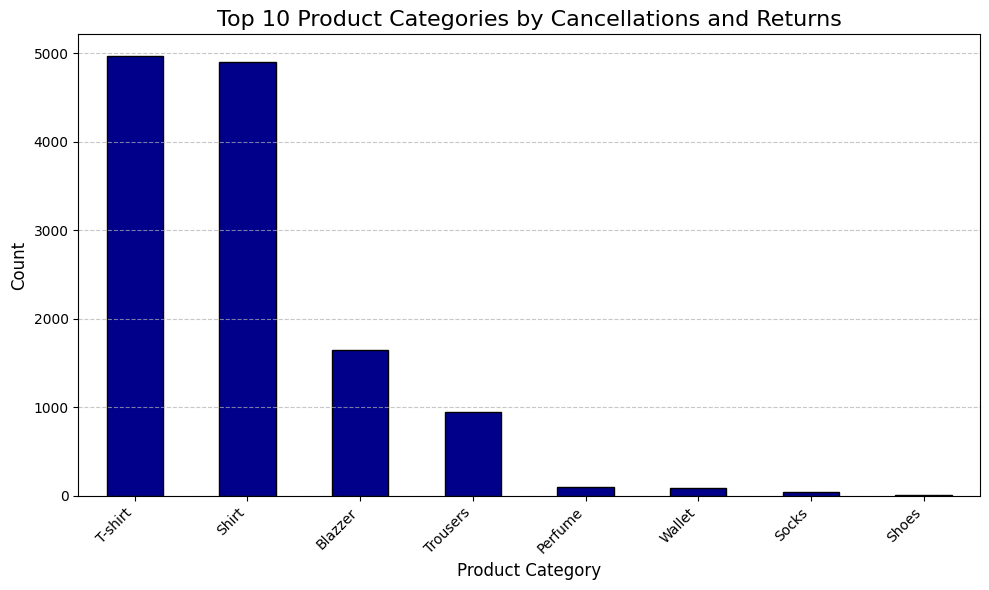

In [6]:
# Cancellations and Returns by Category
plt.figure(figsize=(10, 6))
category_cancellations.head(10).plot(kind='bar', color='darkblue', edgecolor='black')
plt.title("Top 10 Product Categories by Cancellations and Returns", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

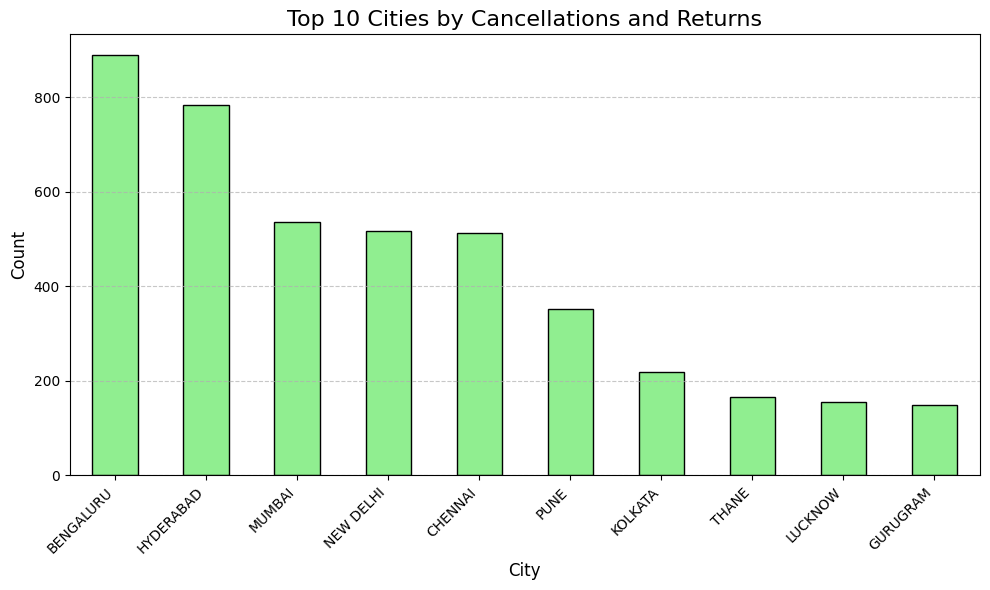

In [10]:
#Bar Graph: Cancellations and Returns by City
plt.figure(figsize=(10, 6))
city_cancellations.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 10 Cities by Cancellations and Returns", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

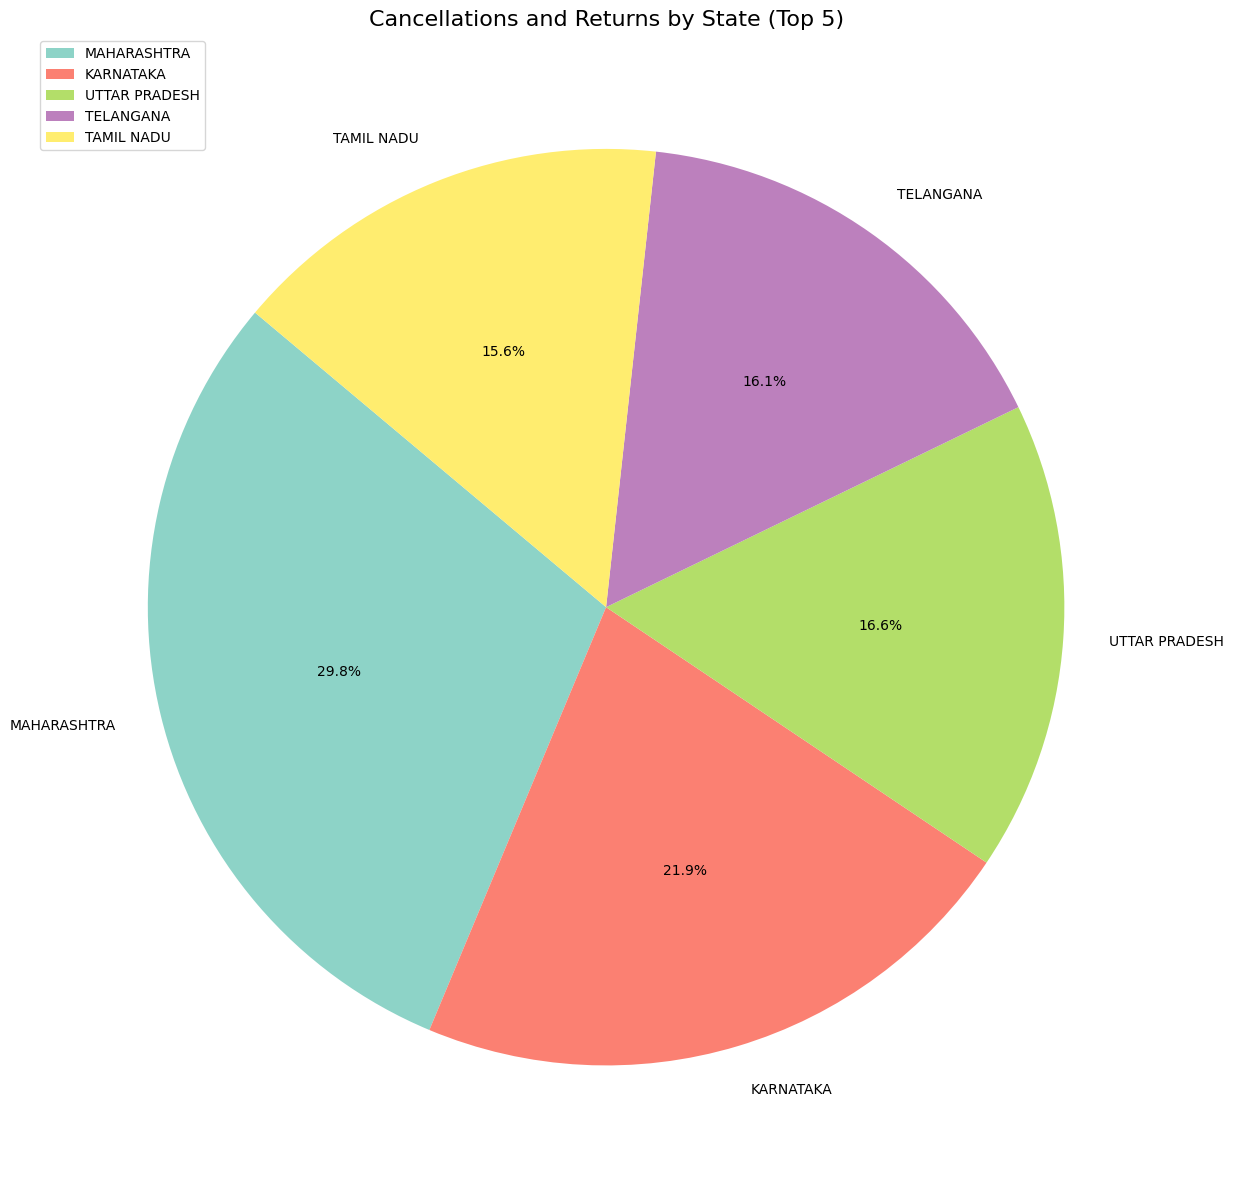

In [11]:
#Pie Chart: Cancellations and Returns by State (Top 5)
plt.figure(figsize=(14, 12))
state_cancellations.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title("Cancellations and Returns by State (Top 5)", fontsize=16)
plt.ylabel("")
plt.legend(loc='upper left') 
plt.tight_layout()
plt.show()

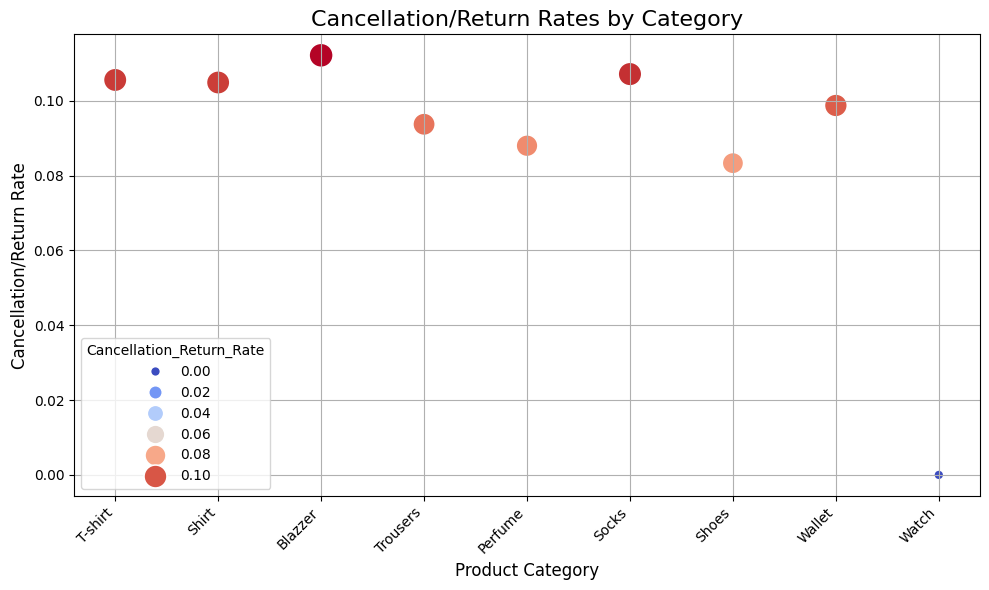

In [12]:
# Scatter Plot: Cancellation/Return Rates by Category
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df.drop_duplicates('Category'),
    x='Category',
    y='Cancellation_Return_Rate',
    hue='Cancellation_Return_Rate',
    size='Cancellation_Return_Rate',
    palette='coolwarm',
    sizes=(50, 300)
)
plt.title("Cancellation/Return Rates by Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Cancellation/Return Rate", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()